# MLCC - Laboratory 4 - Clustering
In this laboratory we will see how to use regularization networks for regression and classification. Follow the instructions below. Think hard before you call the instructors!

Import all the functions from the file "lab4ImpFunction.py" by: <br>
`from lab4ImpFunction import *` <br>
Also import pyplot for plotting: <br>
`import matplotlib.pyplot as plt`

In [1]:
from MLCC_Lab4ImpFunction import *
import matplotlib.pyplot as plt
import numpy as np
from Clusterizer import *

## 1. Warm up - data generation

* **1.A** The function  `MixGauss(means, sigmas, n)` generates dataset  `[X,Y]` where the `X` is composed of mixed classes, each class being generated according to a Gaussian distribution with given mean and standard deviation. The points in the dataset `X` are enumerated from 1 to n, and `Y` represents the label of each point. Hint: if the command help MixGauss fails, this probably means that you have not set up correctly your current working directory'. Have a look at the code or, for a quick help, type "help(MixGauss)" on the Matlab shell.


* **1.B** Use MixGauss to create a dataset with `n` classes, where `n` is betwwen `4` and `8`. Treat every class a a gaussian with a different mean. Have the means lie inside the square of center `(0,0)` with side length = 1. <br>
`X, Y = MixGauss(means=[[0,0],[1,1]], sigmas=[0.5, 0.25], n=50)
plt.figure(1)
plt.title("Dataset 1")
plt.scatter(X[:,0], X[:,1], s=40, c=Y, alpha=0.8) %type "help(plt.scatter)" to see what the parameters mean
plt.show()`


* **1.C** Use the pyplot function `scatter(...)` to plot the training dataset.

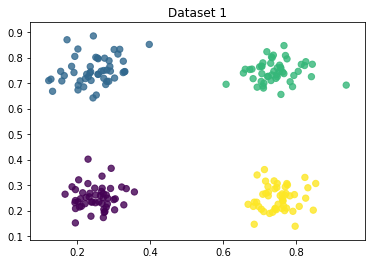

In [29]:
means = [[0.25,0.25],[0.25,0.75],[0.75,0.75],[0.75,0.25]]
sigmas=[0.05,0.05,0.05,0.05]

n = 50
X, Y = MixGauss(means=means, sigmas=sigmas, n=n)
plt.figure(1)
plt.title("Dataset 1")
plt.scatter(X[:,0], X[:,1], s=40, c=Y, alpha=0.8)
plt.show()

In [59]:
a = np.array([[0,1,2,3],[1,3,4,6],[2,6,7,8]])
m = np.mean(a,axis=0)
print(a[:,0:2])


[[0 1]
 [1 3]
 [2 6]]


In [70]:
c = load_Clusterizer(path='Clusterizers/280519/',name='video7_r6')
cs = np.zeros_like(c.values[:,0])
for i,v in enumerate(c.values[:,2]):
    if v > 15:
        cs[i] = 1

#sqrts = np.sqrt(np.var(c.values,axis=0))
sqrts = np.max(c.values,axis=0)


X = c.values/sqrts

## 2. K-means

* **2.A** Read the implementation of the function `LLoyd` in the file `Lab4ImpFunction.py`. Choose at random `k` initial centers for the algorithm. Choose `k` equal to the number of artificially generated clusters in your data. 

    `clusters, centroids = LLoyd(X=X, centers=centers, maxiter=100)`
    
    
* **2.B** Plot the computed cluster using `plt.scatter`
    
    `plt.scatter(X[:,0], X[:,1], s=40, c=clusters, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], s= 150, c=[4,5,6,7], marker='^')
plt.show()`


* **2.C** Load the two moons dataset using the `two_moons` function and repeat the previous steps. What do you observe?

271 5
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[array([0.2       , 0.38618287, 0.20327301, 0.46153846, 0.2468855 ]), array([0.2       , 0.41217549, 0.34177505, 0.30769231, 0.23011679]), array([0.2       , 0.18249316, 0.20923403, 0.23076923, 0.20537679]), array([0.2       , 0.11602186, 0.52612198, 0.07692308, 0.1359203 ]), array([0.2       , 1.        , 0.41623196, 0.61538462, 0.38901111]), array([0.2       , 0.16614978, 0.13229094, 0.15384615, 0.27459063]), array([0.2       , 0.30247418, 0.55268773, 0.15384615, 0.25082358]), array([0.2       , 0.0898178 , 0.48665649, 0.15384615, 0.14265899]), array([0.2       , 0.2875946 , 0.30284923, 0.23076923, 0.2362448 ]), array([0.2       , 0.15753992, 0.56388344, 0.15384615, 0.13808017])]
LLoyd's algorithm: convergence reached
[[0.2        0.3781471  0.26211987 0.47115385 0.22566918]
 [0.22222222 0.51120829 0.44016797 

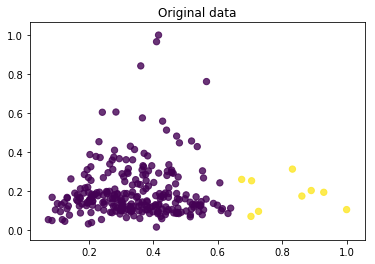

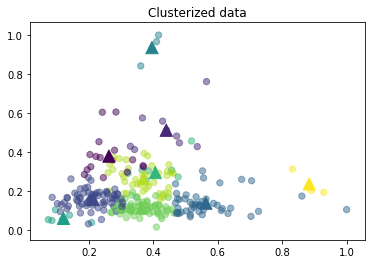

In [73]:
X = c.values/sqrts
k = 10
#X = X[:,0:3]
dim = X.shape[0]
print(dim,X.shape[1])
colors = [0,1,2,3,4,5,6,7,8,9]

centers_i = np.zeros(k)
centers = [[0,0,0,0,0]]*k
print(centers)
for i in range(k):
    #centers_i[i] = np.random.randint(0,dim)
    centers[i] = X[np.random.randint(0,dim)]

print(centers)
clusters, centroids = LLoyd(X=X, centers=centers, maxiter=100)
print(centroids)

plt.figure(1)
plt.title("Original data")
plt.scatter(X[:,2], X[:,1], s=40, c=cs, alpha=0.8)
plt.show()

plt.figure(0)
plt.title("Clusterized data")
plt.scatter(X[:,2], X[:,1], s=40, c=clusters, alpha=0.5)
plt.scatter(centroids[:,2], centroids[:,1], s= 150, c=colors[:k], marker='^')
plt.show()

100
[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]
[array([ 0.02500805,  0.91091108]), array([ 0.2726863 , -1.43409815]), array([-0.56192817, -0.83318975]), array([-0.88071619, -1.4674251 ]), array([-0.15925193,  1.12040354]), array([ 0.16340205, -1.29845286])]
LLoyd's algorithm: convergence reached
[[ 0.18087994  0.56084086]
 [-0.09678288 -1.27617416]
 [-0.8086967  -0.40492823]
 [-0.89558352 -1.38266963]
 [-0.55339188  0.74211057]
 [ 0.49400463 -0.60835316]]


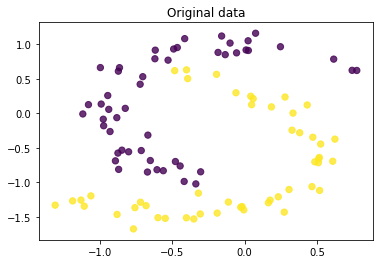

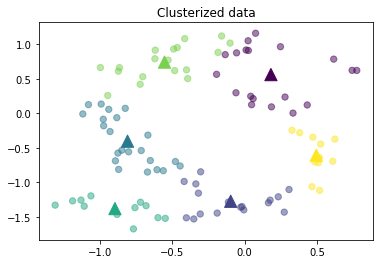

In [34]:
ntr = 100
Xtr, Ytr, Xts, Yts = two_moons(npoints=ntr, pflip=1)


k = 6
dim = Xtr.shape[0]
print(dim)

centers_i = np.zeros(k)
centers = [[0,0]]*k
print(centers)
for i in range(k):
    #centers_i[i] = np.random.randint(0,dim)
    centers[i] = Xtr[np.random.randint(0,dim)]

print(centers)
clusters, centroids = LLoyd(X=Xtr, centers=centers, maxiter=10)
print(centroids)

plt.figure(1)
plt.title("Original data")
plt.scatter(Xtr[:,0], Xtr[:,1], s=40, c=Ytr, alpha=0.8)
plt.show()

plt.figure(0)
plt.title("Clusterized data")
plt.scatter(Xtr[:,0], Xtr[:,1], s=40, c=clusters, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], s= 150, c=range(k), marker='^')
plt.show()

## 3. Spectral clustering

* **2.A** Generate the normalized Laplacian matrix of your dataset using `normLaplacian` function

* **2.B** Compute the SVD on the Laplacian and plot the *smallest* eigenvalues of the Laplacian. You can do SVD by just performing PCA with k equale to the number of points in your dataset
    
    `V,d,X_proj = PCA(L, k=n*k)
plot_dim = 20
plt.scatter(np.arange(plot_dim), d[-plot_dim:], s=40, alpha=0.5)
plt.show()`


* **2.C** Visualize the dimensions associated with the *smallest* eigenvalues (you can access an array from the end using negative indices). As the eigenvalue associated with the dimension grows, what do you observe?

    `plt.scatter(V[-1], V[-2], s=40, c=Y, alpha=0.5)
plt.show()`


* **2.D** Load the two moons dataset using the `two_moons` function and repeat the previous steps. What do you observe?

In [22]:
help(PCA)

Help on function PCA in module MLCC_Lab4ImpFunction:

PCA(X, k)
    Computes the first k eigenvectors, eigenvalues and projections of the 
    data matrix X
    usage: V, d, X_proj = PCA(X, k)
    
    X: is the dataset
    k: is the number of components
     
    V:      is a matrix of the form [v_1, ..., v_k] where v_i is the i-th
    eigenvector
    d:      is the list of the first k eigenvalues
    X_proj: is the projection of X on the linear space spanned by the
    eigenvectors in V



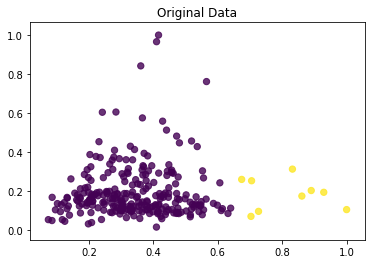

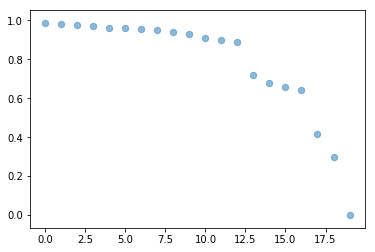

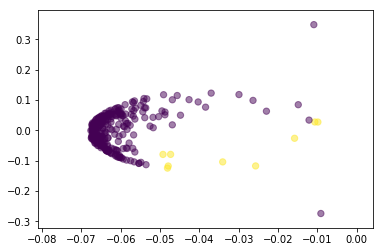

In [84]:
plt.figure(0)
plt.title("Original Data")
plt.scatter(X[:,2], X[:,1], s=40, c=cs, alpha=0.8)
plt.show()

L = normLaplacian(X=X, sigma=0.3)


V,d,X_proj = PCA(L, k=k)

plt.figure(1)
plot_dim = 20
plt.scatter(np.arange(plot_dim), d[-plot_dim:], s=40, alpha=0.5)
plt.show()

plt.figure(2)
plt.scatter(V[-1], V[-4], s=40, c=cs, alpha=0.5)
plt.show()

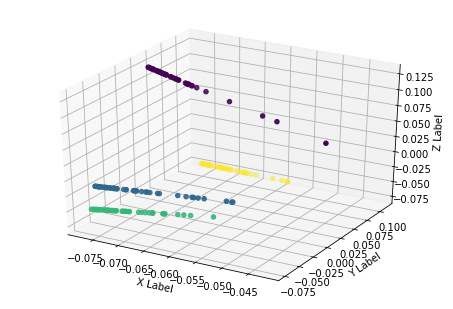

In [72]:
fig = pyplot.figure()
ax = Axes3D(fig)

x = V[-1].real
y = V[-2].real
z = V[-3].real

ax.scatter(x, y, z, c=Y, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()